In [2]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import f_oneway, chi2_contingency

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_excel('adidas_sales_dataset.xlsx')

In [4]:
df = dataset.copy()

In [5]:
df

,retailer_id,retailer,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,1185732,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,1185732,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,1185732,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,1185732,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,1185732,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,1185732,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,1185732,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,1185732,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,1185732,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [6]:
df.shape

(9648, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer_id       9648 non-null   int64         
 1   retailer          9648 non-null   object        
 2   invoice_date      9648 non-null   datetime64[ns]
 3   region            9648 non-null   object        
 4   state             9648 non-null   object        
 5   city              9648 non-null   object        
 6   product           9648 non-null   object        
 7   price_per_unit    9648 non-null   float64       
 8   units_sold        9648 non-null   int64         
 9   total_sales       9648 non-null   float64       
 10  operating_profit  9648 non-null   float64       
 11  operating_margin  9648 non-null   float64       
 12  sales_method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [8]:
df.describe()

,retailer_id,invoice_date,price_per_unit,units_sold,total_sales,operating_profit,operating_margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [9]:
df.isna().sum()

retailer_id         0
retailer            0
invoice_date        0
region              0
state               0
city                0
product             0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
operating_margin    0
sales_method        0
dtype: int64

# Cek Value Counts

In [10]:
df['retailer_id'].value_counts()

retailer_id
1185732    5265
1128299    2370
1197831    1653
1189833     360
Name: count, dtype: int64

In [11]:
df['retailer_id'].unique()

array([1185732, 1197831, 1128299, 1189833], dtype=int64)

In [12]:
df['invoice_date'].nunique()

724

In [13]:
df['region'].value_counts()

region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

In [14]:
df['state'].value_counts()

state
California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee         216
South Dakota      144
Illinois          144
Colorado          144
New Jersey        144
Delaware          144
Maryland          144
West Virginia     144
Indiana           144
Wisconsin         144
Iowa              144
North Dakota      144
Michigan          144
Kansas            144
Missouri          144
Minnesota         144
Montana           144
Kentucky          144
Ohio              144
North Carolina    144
South Carolina    144
Nebraska          144
Main

In [15]:
df['city'].value_counts()

city
Portland          360
Charleston        288
Orlando           216
Salt Lake City    216
Houston           216
Boise             216
Phoenix           216
Albuquerque       216
Atlanta           216
New York          216
Jackson           216
Little Rock       216
Oklahoma City     216
Hartford          216
Providence        216
Boston            216
Burlington        216
Richmond          216
New Orleans       216
Manchester        216
Dallas            216
Philadelphia      216
Knoxville         216
Birmingham        216
Las Vegas         216
Los Angeles       216
San Francisco     216
Chicago           144
Newark            144
Baltimore         144
Indianapolis      144
Milwaukee         144
Des Moines        144
Fargo             144
Sioux Falls       144
Wichita           144
Wilmington        144
Honolulu          144
Albany            144
Louisville        144
Columbus          144
Charlotte         144
Seattle           144
Miami             144
Minneapolis       144
Billi

In [16]:
df['product'].value_counts()

product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

In [17]:
df['sales_method'].value_counts()

sales_method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

# Distribusi Data

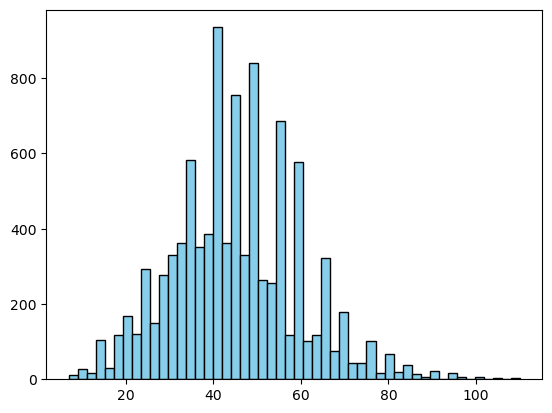

In [19]:
plt.hist(df['price_per_unit'], bins=50, color='skyblue', edgecolor='black')
plt.show()

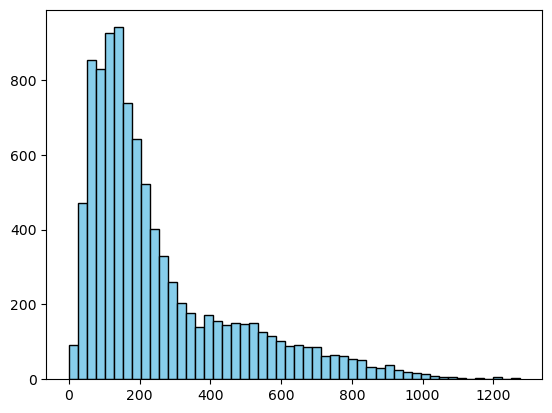

In [20]:
plt.hist(df['units_sold'], bins=50, color='skyblue', edgecolor='black')
plt.show()

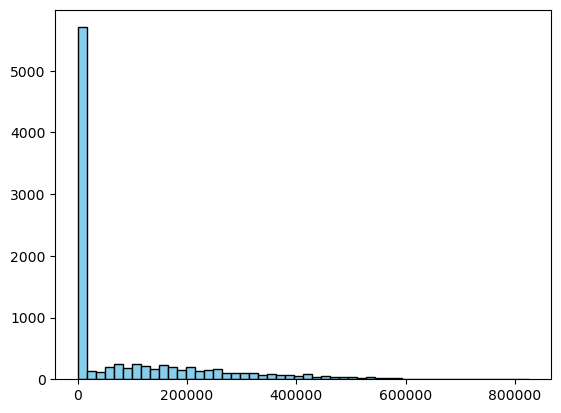

In [21]:
plt.hist(df['total_sales'], bins=50, color='skyblue', edgecolor='black')
plt.show()

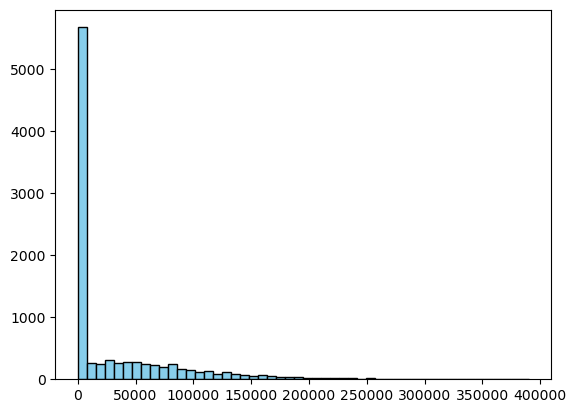

In [22]:
plt.hist(df['operating_profit'], bins=50, color='skyblue', edgecolor='black')
plt.show()

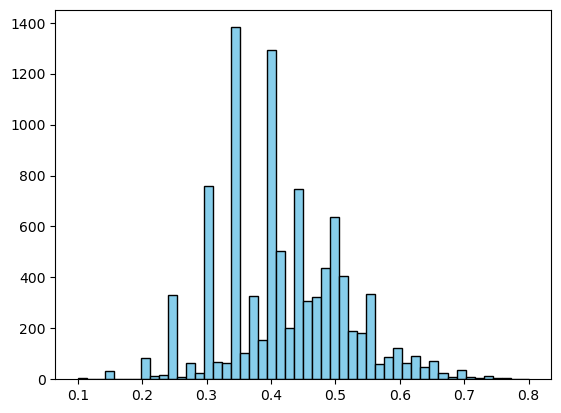

In [23]:
plt.hist(df['operating_margin'], bins=50, color='skyblue', edgecolor='black')
plt.show()

# Exploratory Data Analysis 